In [1]:
import random
import cv2
from matplotlib import pyplot as plt

from Model.zoo import ResUNetModel1024
from Model.Inference import voting_inference, heatmap_inference

from utils import load_image

2025-07-31 08:08:39.136672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753963719.150100    6827 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753963719.154733    6827 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753963719.164091    6827 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753963719.164102    6827 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1753963719.164103    6827 computation_placer.cc:177] computation placer alr

In [2]:

model = ResUNetModel1024(weights="../../Model/zoo/weights/unet-1024-100-processed-cbis.weights.h5", input_shape=(128, 128, 1))
model = model.load_model()
output_dir = "../../CBIS"
image_idx = 10
mask_threshold = 0.5
grid_range = (2, 10)
random.seed(42)
index_range = [random.randint(0, 797) for _ in range(50)]
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))


2025-07-31 08:08:46.022451: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:

image_path = "../../CBIS_DDSM_Dataset/1-014.png"
mask_path = "../../CBIS_DDSM_Dataset/1-014_mask.png"

preds = voting_inference(image_path, (4,10), model, vote_threshold=4, mask_threshold=0.5, crop_output=128, filter=clahe)
heatmap = heatmap_inference(image_path, (4,10), model, crop_output=128, filter=clahe)

Grid 4: (16, 128, 128)
Grid 5: (25, 128, 128)
Grid 6: (36, 128, 128)
Grid 7: (49, 128, 128)
Grid 8: (64, 128, 128)
Grid 9: (81, 128, 128)
Grid 10: (100, 128, 128)
Voting statistics:
- Total grids: 7
- Vote threshold: 4
- Pixels with max votes (7): 359389
- Pixels with >= 4 votes: 2138530
- Final positive pixels: 2138530
Grid 4: (16, 128, 128)
Grid 5: (25, 128, 128)
Grid 6: (36, 128, 128)
Grid 7: (49, 128, 128)
Grid 8: (64, 128, 128)
Grid 9: (81, 128, 128)
Grid 10: (100, 128, 128)


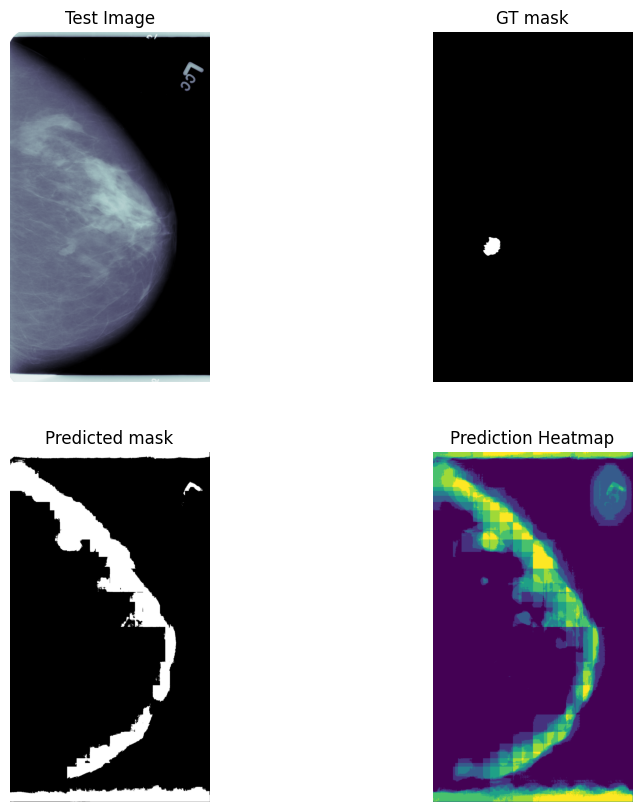

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[1][0].imshow(preds, cmap="gray")
axes[1][0].set_title("Predicted mask")
axes[1][0].axis("off")

im = axes[1][1].imshow(heatmap, cmap='viridis')
axes[1][1].set_title('Prediction Heatmap')
axes[1][1].axis("off")

mask = load_image(mask_path)
axes[0][1].set_title("GT mask")
axes[0][1].imshow(mask, cmap="bone")
axes[0][1].axis("off")

mask = load_image(image_path)
axes[0][0].set_title("Test Image")
axes[0][0].imshow(mask, cmap="bone")
axes[0][0].axis("off")

plt.show()

In [ ]:
preds.any()

In [ ]:
import cv2
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[1].imshow(img_clahe, cmap="bone")
axes[0].imshow(img, cmap="bone")

In [ ]:
cv2.imwrite("clahe.png", img_clahe)